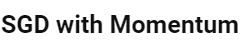

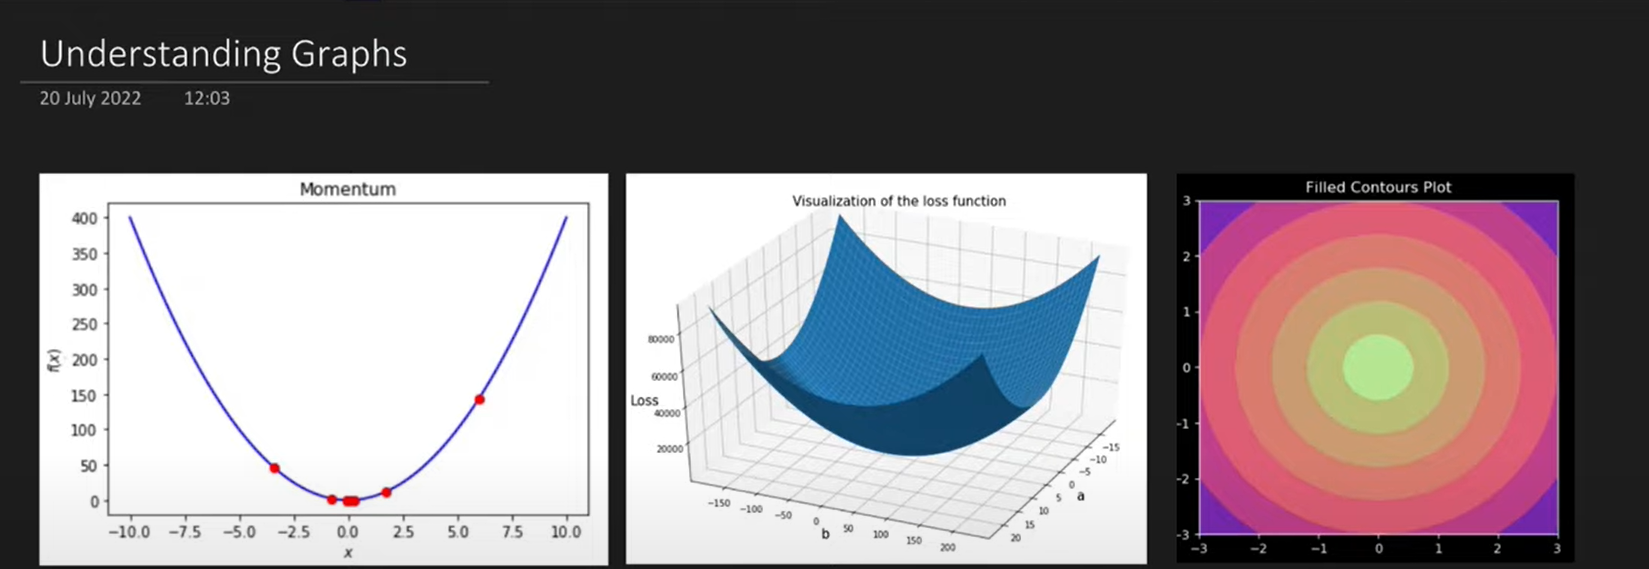

fisrt graph is loss Vs Weight

second graph is loss Vs Weigh Vs Bias(#D)

last graph is contour graph: is projection of 3d graph to visualize in 2d

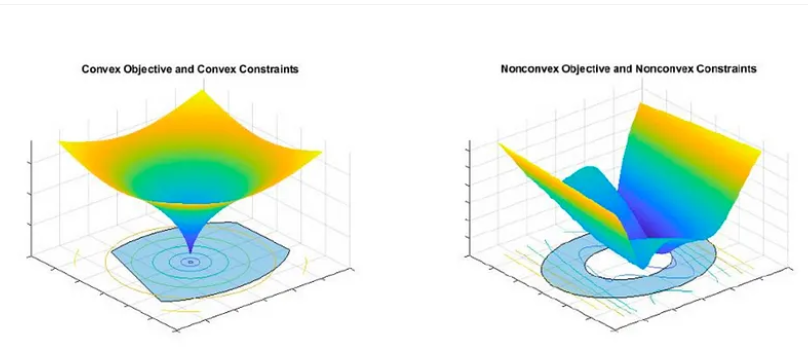

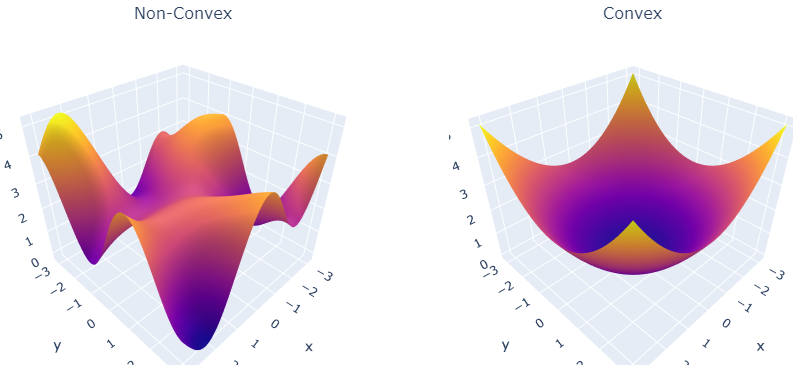

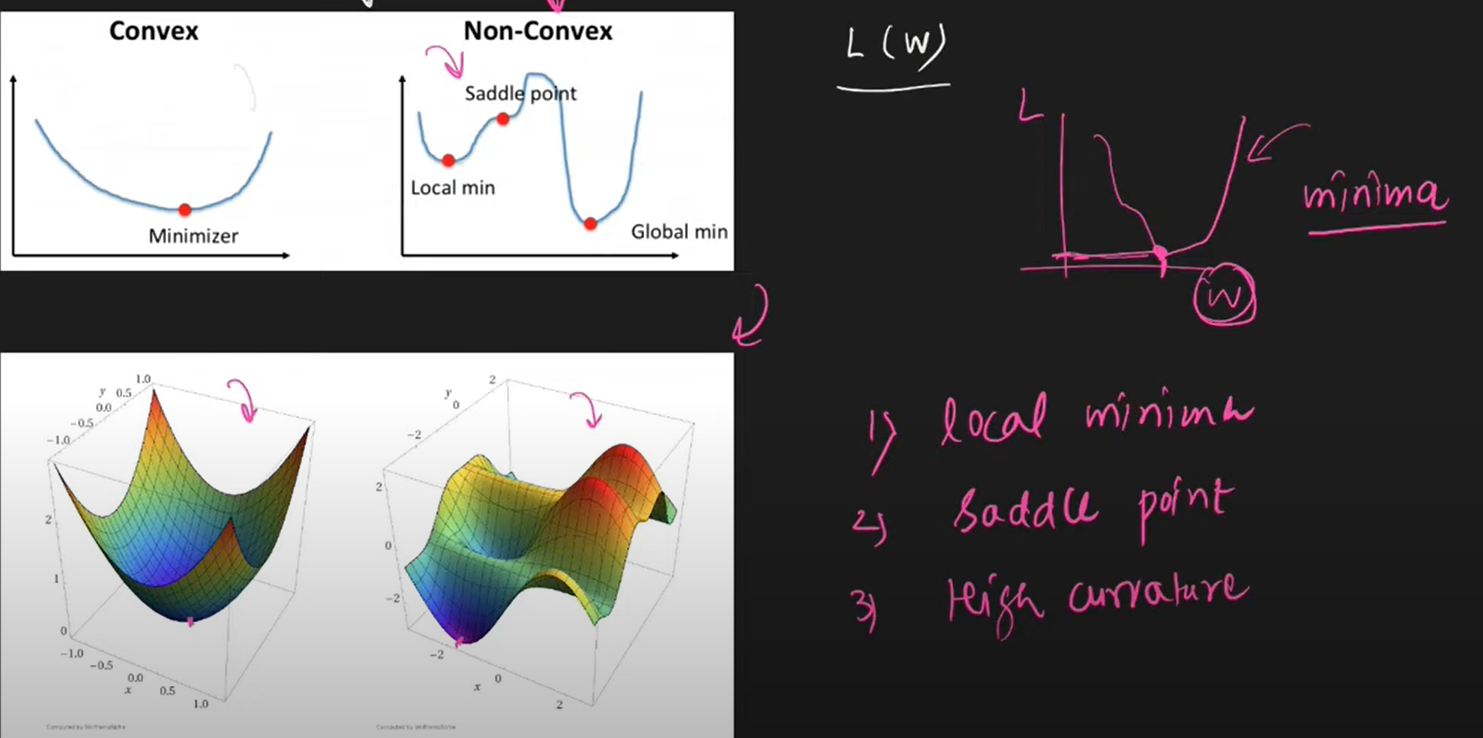

saddle point : from side graph getting upside and from another side it getting downside

which look like flat-surface



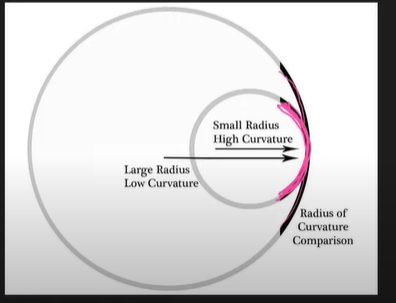

# SGD Momentum Optimization : 
- it is fasted optimization compare to other GD algorithms
if your previous gradient is moving toward the one direction then we increase the speed(momentum) toward the same direction

Momentum Optimization : solve below problems
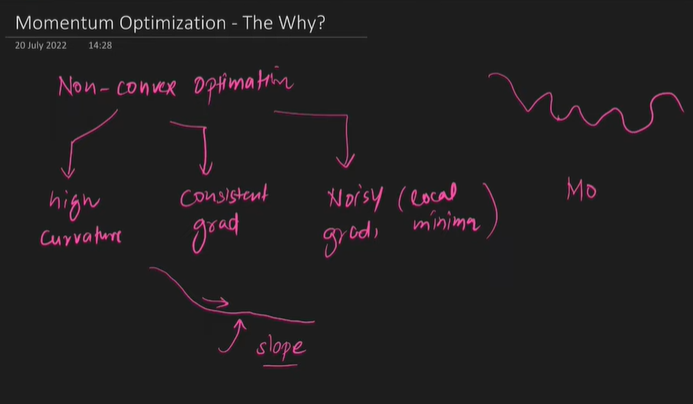

momentum =  Mass*Velocity
mass = 1 unit

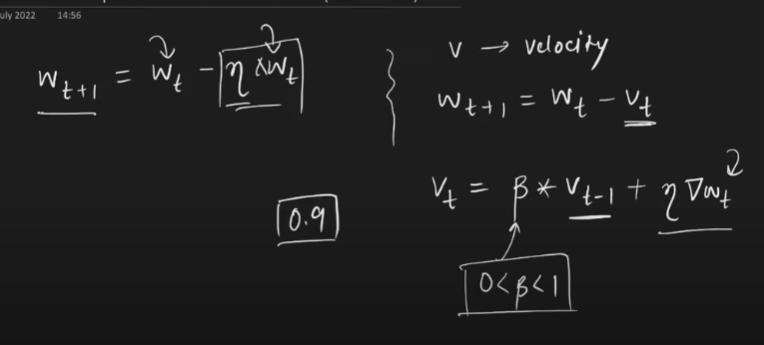
Vt-1 : velocity at previous step


this current gradient at point t
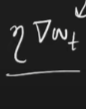

this momentum component

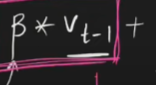

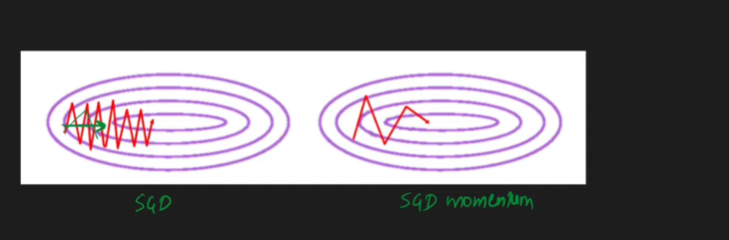

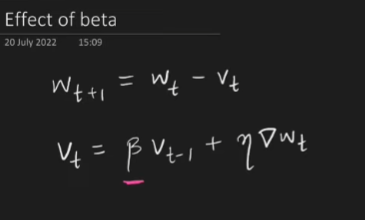

if value of beta =0  it will act as normal SGD
beta is decaying factor

and it tell how much contribution of your past velocity
recent velocity  value more contribution

if beta =1 : there will be no decay at will stuck in dynamic flow

Adv SGD momentum : 
- it faster than GD
- Escape from the local minima

Dis :

because of the speed (momentum) when it  reaching to the global minima it getting oscillate 
momentum is the  problem of momentum optimizers

check blue color

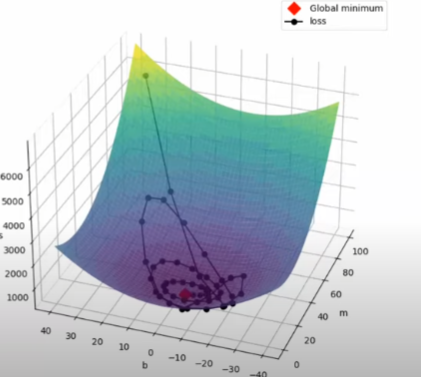
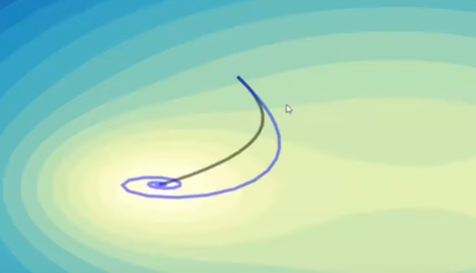





#  Nesterov Accelerated Gradient (NAG) OpTimizers:
it is the improvised version of the momentum 
to reduce(damp) the oscillation 


how it work :
histor of velocity  + gradient of that point 

we need to do this two updation ,So here we cal momentum(new) and then we update the gradient of the newly momentum


la =look ahead point of the momentum
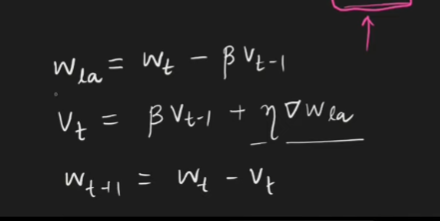



NAG resolves this problem by adding a look ahead term in our equation. The intuition behind NAG can be summarized as ‘look before you leap’. Let us try to understand this through an example.

                             

Source: Link

As can see, in the momentum-based gradient, the steps become larger and larger due to the accumulated momentum, and then we overshoot at the 4th step. We then have to take steps in the opposite direction to reach the minimum point. 

However, the update in NAG happens in two steps. First, a partial step to reach the look-ahead point, and then the final update. We calculate the gradient at the look-ahead point and then use it to calculate the final update. If the gradient at the look-ahead point is negative, our final update will be smaller than that of a regular momentum-based gradient. Like in the above example, the updates of NAG are similar to that of the momentum-based gradient for the first three steps because the gradient at that point and the look-ahead point are positive. But at step 4, the gradient of the look-ahead point is negative.

In NAG, the first partial update 4a will be used to go to the look-ahead point and then the gradient will be calculated at that point without updating the parameters. Since the gradient at step 4b is negative, the overall update will be smaller than the momentum-based gradient descent. 

We can see in the above example that the momentum-based gradient descent takes six steps to reach the minimum point, while NAG takes only five steps.

This looking ahead helps NAG to converge to the minimum points in fewer steps and reduce the chances of overshooting.


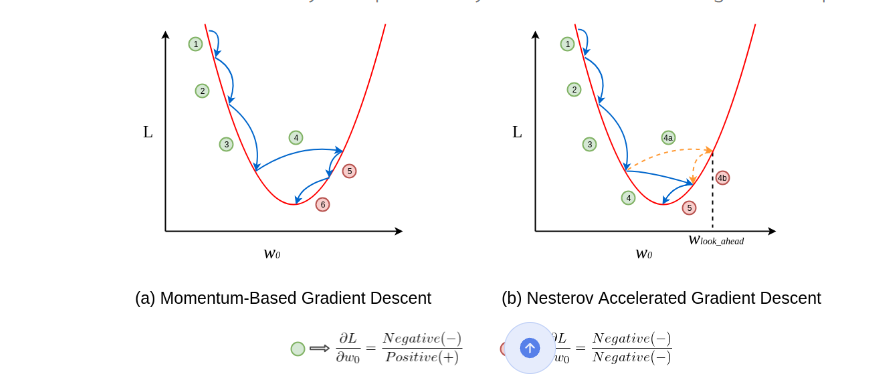

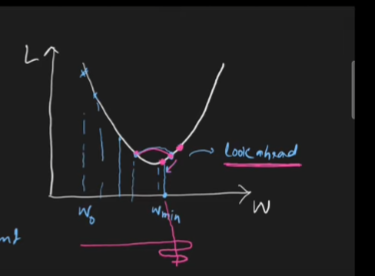

#because of reducing oscillation(damping) it may stuck in global minima

implementation of three different optimizers
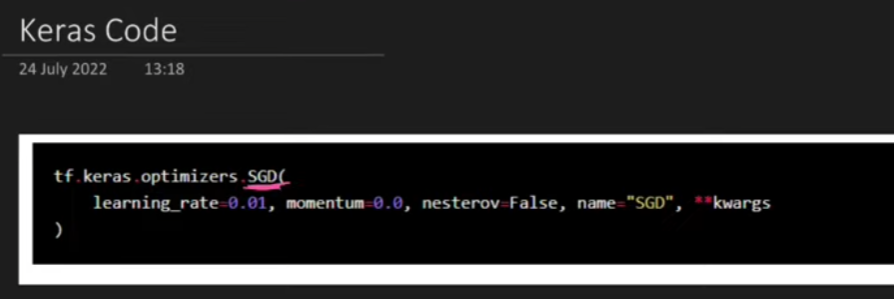

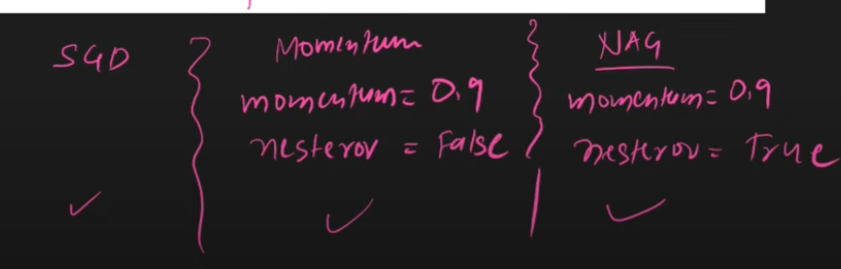

In [4]:
from keras.models import Sequential
from keras.optimizers import SGD


# Adaptive Gradient (AdaGrad) :
-  this we use if we have parse data mean in your column has lot of zeros values
here learning rate are not fix
it change (adapt) according to situation

it work very well in following situation

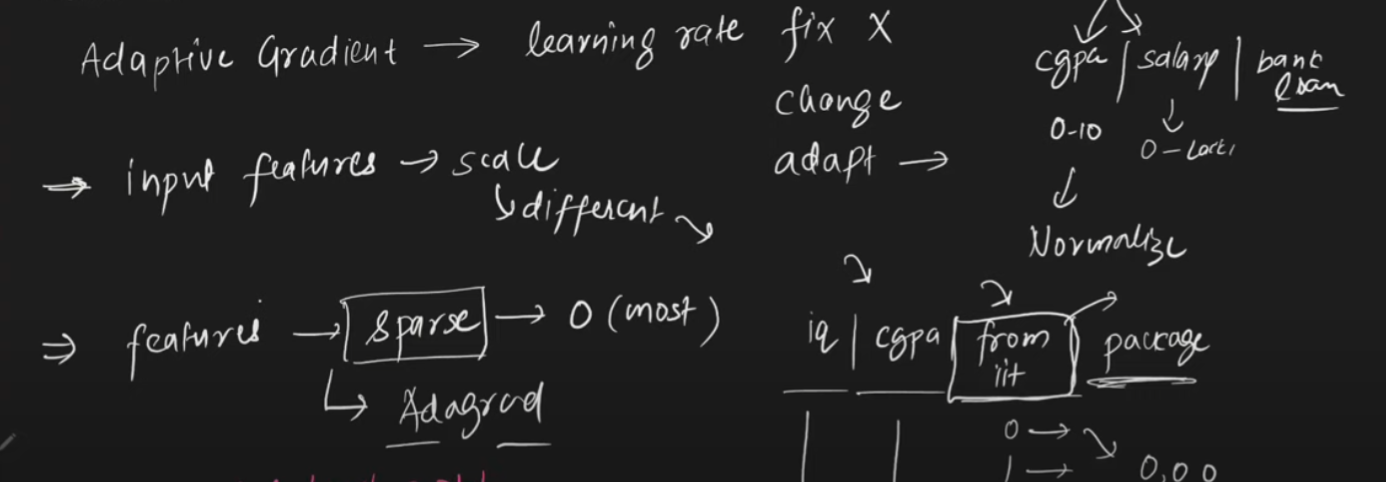

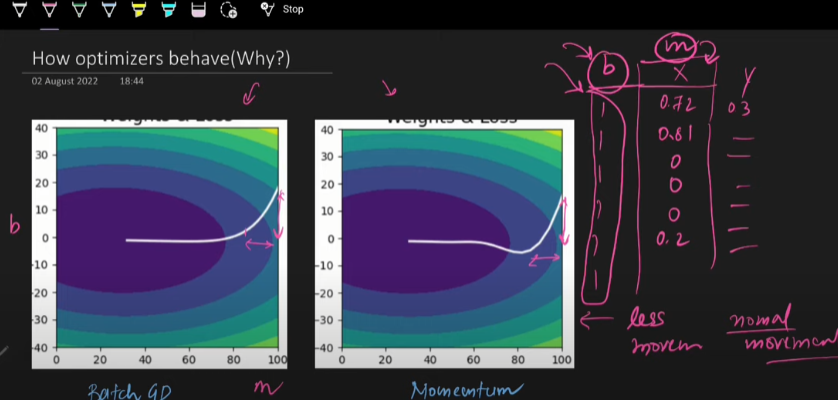

sparse value mean zeros

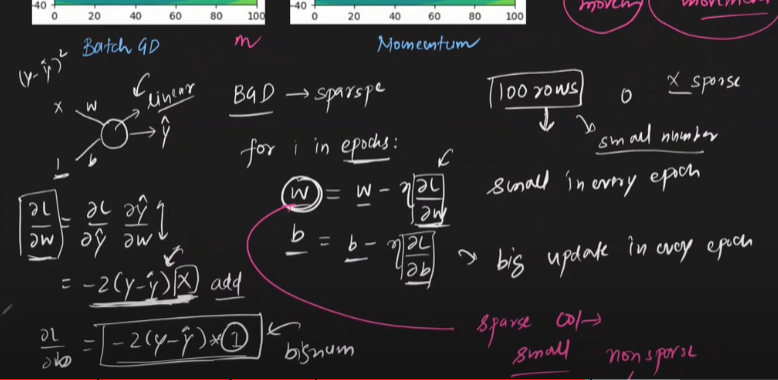

because of the sparse value in columns , updation in Batch GD is very slow
solution : we can change the learinng rate :
how if parameters update(of weight and biases) is big then set low learning rate and voiceversa
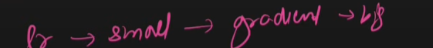

mathematical Formula of adagrad

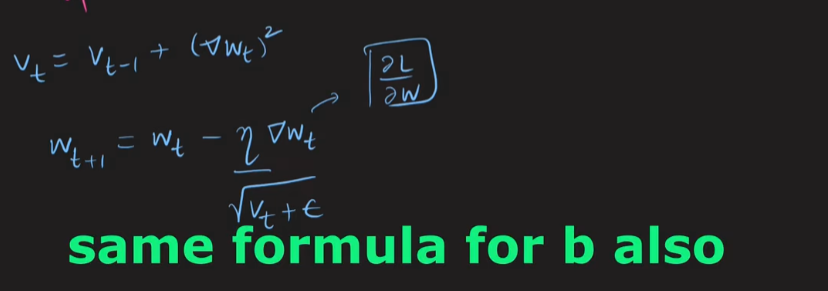


Disadvantages:

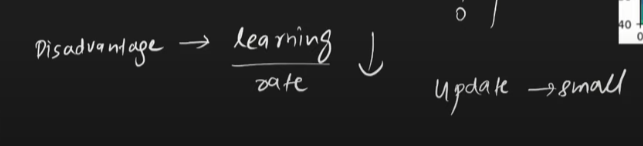
it reach near to solution but not to exact solution mean conversion not happening (we dont reach to global minima
)

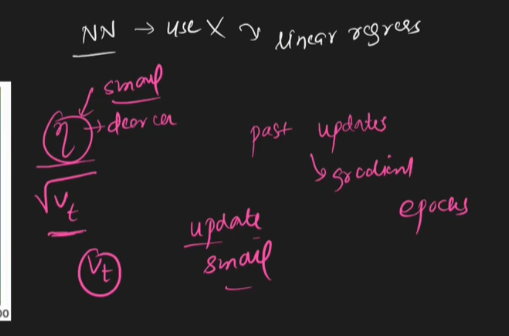




# RMSProp 

- Rms Solve the Adagrad problem which  is not converse to global minima


RMSProp (Root Mean Squared Propagation) is an adaptive learning rate optimization algorithm. It is an extension of the popular Adaptive Gradient Algorithm and is designed to dramatically reduce the amount of computational effort used in training neural networks. This algorithm works by exponentially decaying the learning rate every time the squared gradient is less than a certain threshold. This helps reduce the learning rate more quickly when the gradients become small. In this way, RMSProp is able to smoothly adjust the learning rate for each of the parameters in the network, providing a better performance than regular Gradient Descent alone.

The RMSprop algorithm utilizes exponentially weighted moving averages of squared gradients to update the parameters. Here is the mathematical equation for RMSprop:

Initialize parameters:
Learning rate: α
Exponential decay rate for averaging: γ
Small constant for numerical stability: ε
Initial parameter values: θ
Initialize accumulated gradients (Exponentially weighted average):
Accumulated squared gradient for each parameter: Et​= 0
Repeat until convergence or maximum iterations:
Compute the gradient of the objective function with respect to the parameters:g_t = \nabla_\theta J(\theta_t) 
Update the exponentially weighted average of the squared gradients:E_t = \gamma E_{t-1} + (1-\gamma) g_t^2 
Update the parameters:\theta_{t+1} = \theta_t - \alpha \frac{g_t}{\sqrt{E_t+ \epsilon}} 
where,

gt is the gradient of the loss function with respect to the parameters at time t
\gamma is a decay factor
Et​ is the exponentially weighted average of the squared gradients
α is the learning rate
ϵ is a small constant to prevent division by zero
This process is repeated for each parameter in the optimization problem, and it helps adjust the learning rate for each parameter based on the historical gradients. The exponential moving average allows the algorithm to give more importance to recent gradients and dampen the effect of older gradients, providing stability during optimization.

Implementation
Now, we will look into the implementation of the RMSprop. We will first import all the necessary libraries as follows.

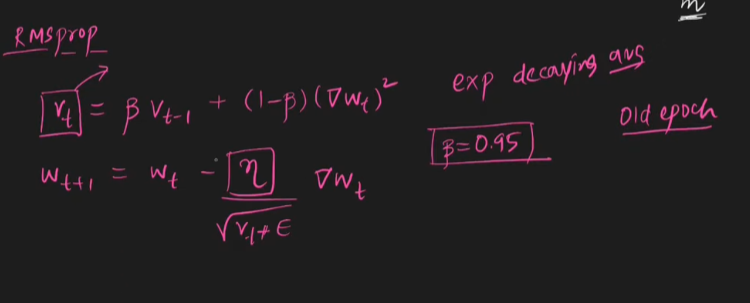
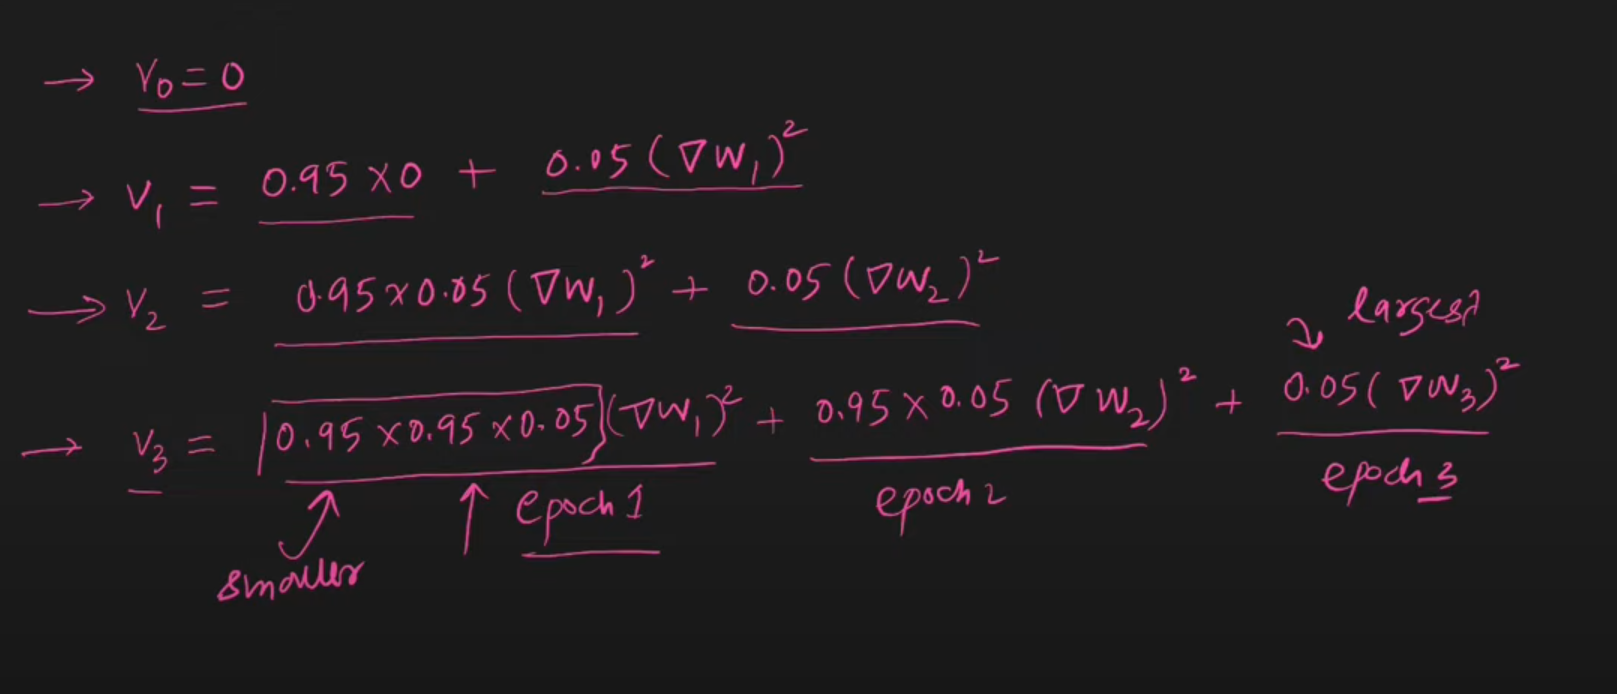
one the epoch increase the we give the less weightage to previous gradient and give the more weightage to recent update <br>
because the value of vt never overshoot (never high ) 
weigthed sum is called exponentially decaying avg >>> more weightage to recent update 

it reaches to global minima


`it work well on `

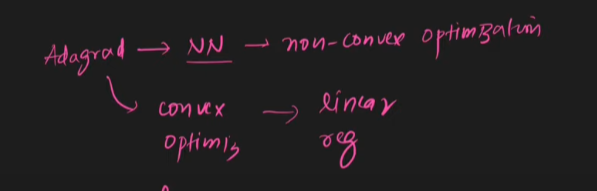

DisAdvatages : NO

# Adam (Adaptive Moment Estimation)

Adam is combination of RMSprop and Stochastic Gradient Descent with momentum.

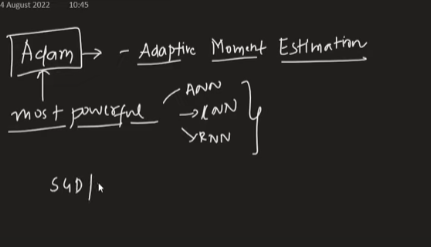
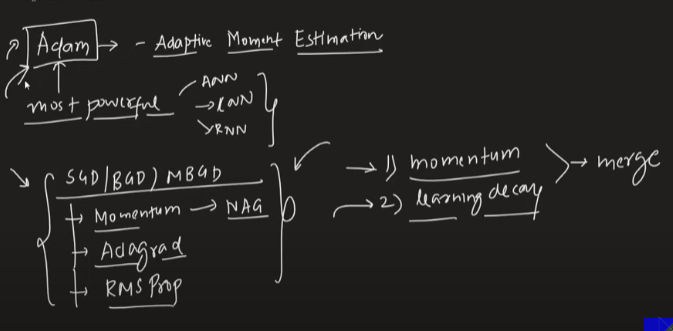


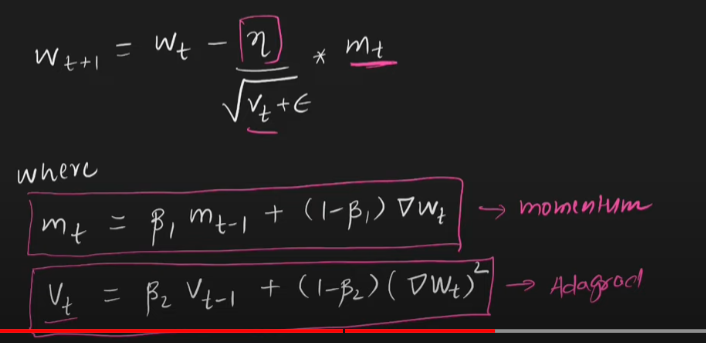


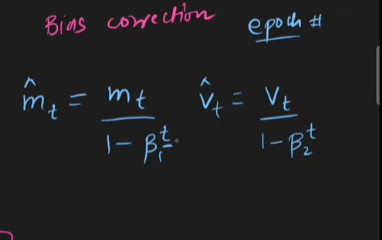 
# only this eq t=epochs
# biase correction is need because of the intially value of 
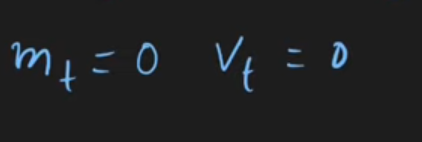


Momentum: 

This algorithm is used to accelerate the gradient descent algorithm by taking into consideration the ‘exponentially weighted average’ of the gradients. Using averages makes the algorithm converge towards the minima in a faster pace. 


​
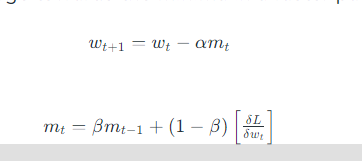
 
where,



mt = aggregate of gradients at time t [current] (initially, mt = 0)
mt-1 = aggregate of gradients at time t-1 [previous]
Wt = weights at time t
Wt+1 = weights at time t+1
αt = learning rate at time t 
∂L = derivative of Loss Function
∂Wt = derivative of weights at time t
β = Moving average parameter (const, 0.9)
Root Mean Square Propagation (RMSP): 

Root mean square prop or RMSprop is an adaptive learning algorithm that tries to improve AdaGrad. Instead of taking the cumulative sum of squared gradients like in AdaGrad, it takes the ‘exponential moving average’.

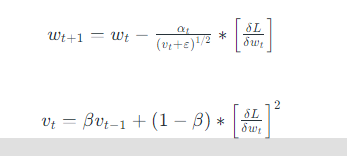


Wt = weights at time t
Wt+1 = weights at time t+1
αt = learning rate at time t 
∂L = derivative of Loss Function
∂Wt = derivative of weights at time t
Vt = sum of square of past gradients. [i.e sum(∂L/∂Wt-1)] (initially, Vt = 0)
β = Moving average parameter (const, 0.9)
ϵ = A small positive constant (10-8)
NOTE: Time (t) could be interpreted as an Iteration (i). 

Adam Optimizer inherits the strengths or the positive attributes of the above two methods and builds upon them to give a more optimized gradient descent. 